In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.pipeline import make_pipeline

In [289]:

# Set random seed for reproducibility
np.random.seed(42)

# Generate input data
X = np.linspace(-3, 3, 30)
# True relationship
Y_true = X**2
# Add noise
noise = np.random.normal(0, 1, size=X.shape)
Y = Y_true + noise

In [299]:
np.array([X,Y]).T

array([[-3.        ,  9.49671415],
       [-2.79310345,  7.66316257],
       [-2.5862069 ,  7.33615465],
       [-2.37931034,  7.18414757],
       [-2.17241379,  4.48522831],
       [-1.96551724,  3.62912107],
       [-1.75862069,  4.67195955],
       [-1.55172414,  3.17528253],
       [-1.34482759,  1.33908685],
       [-1.13793103,  1.83744708],
       [-0.93103448,  0.40340752],
       [-0.72413793,  0.05864599],
       [-0.51724138,  0.50950092],
       [-0.31034483, -1.81696633],
       [-0.10344828, -1.71421629],
       [ 0.10344828, -0.55158598],
       [ 0.31034483, -0.91651721],
       [ 0.51724138,  0.58178598],
       [ 0.72413793, -0.38364833],
       [ 0.93103448, -0.54547849],
       [ 1.13793103,  2.76053581],
       [ 1.34482759,  1.58278494],
       [ 1.55172414,  2.475376  ],
       [ 1.75862069,  1.66799854],
       [ 1.96551724,  3.3188753 ],
       [ 2.17241379,  4.83030428],
       [ 2.37931034,  4.51012414],
       [ 2.5862069 ,  7.06416413],
       [ 2.79310345,

In [301]:
data = pd.DataFrame(np.array([X,Y]).T, columns=['X','Y'])

In [307]:
Train, Test = train_test_split(data, test_size=0.4, random_state=42)

In [309]:
Test, Validation = train_test_split(Test, test_size=0.5, random_state=42)

In [315]:
Train.shape, Test.shape, Validation.shape

((18, 2), (6, 2), (6, 2))

In [229]:
X = pd.DataFrame(X, columns=['X'])

In [231]:
noise

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375])

In [233]:
Y = pd.DataFrame(Y, columns=['Y'])

In [ ]:
train_test_split(X,Y, test_size=0.3, random_state=42)

In [235]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

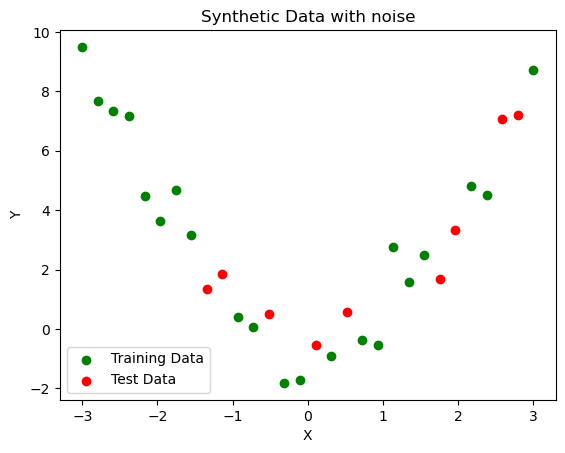

In [237]:
plt.scatter(X_train, Y_train, color = 'green', label = 'Training Data')
plt.scatter(X_test, Y_test, color = 'red', label = 'Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Data with noise')
plt.legend()
plt.show()

In [239]:
degree = 15
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [241]:
poly_model.fit(X_train,Y_train )

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('linearregression', LinearRegression())])

In [243]:
y_train_pred = poly_model.predict(X_train)
y_test_pred = poly_model.predict(X_test)

In [245]:
mean_absolute_percentage_error(Y_train, y_train_pred)

0.4672567776633866

In [247]:
mean_absolute_percentage_error(Y_test, y_test_pred)

5.289887219173027

In [249]:
mean_squared_error(Y_train, y_train_pred)

0.24787907406313126

In [251]:
mean_squared_error(Y_test, y_test_pred)

5130.941645111143

In [253]:
print("Overfitted Model train MSE ", mean_squared_error(Y_train, y_train_pred))
print("Overfitted Model test MSE ", mean_squared_error(Y_test, y_test_pred))

Overfitted Model train MSE  0.24787907406313126
Overfitted Model test MSE  5130.941645111143


In [255]:
X_plot = X.values

In [257]:
Y_plot_lr = poly_model.predict(X_plot)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [259]:
Y_plot

array([[ 9.50653810e+00],
       [ 7.55309458e+00],
       [ 7.81529153e+00],
       [ 6.23336472e+00],
       [ 5.04252759e+00],
       [ 4.44209287e+00],
       [ 3.77216043e+00],
       [ 2.76420296e+00],
       [ 1.62232773e+00],
       [ 6.49716256e-01],
       [-5.15580034e-03],
       [-3.66902783e-01],
       [-5.36304293e-01],
       [-6.04779323e-01],
       [-6.24607398e-01],
       [-6.16130418e-01],
       [-5.80679217e-01],
       [-5.04255099e-01],
       [-3.50884520e-01],
       [-4.73287626e-02],
       [ 5.30671614e-01],
       [ 1.52988002e+00],
       [ 2.97971014e+00],
       [ 4.53364646e+00],
       [ 5.34604852e+00],
       [ 4.76291910e+00],
       [ 4.53426001e+00],
       [ 1.11334898e+01],
       [ 2.84554782e+01],
       [ 8.70805280e+00]])

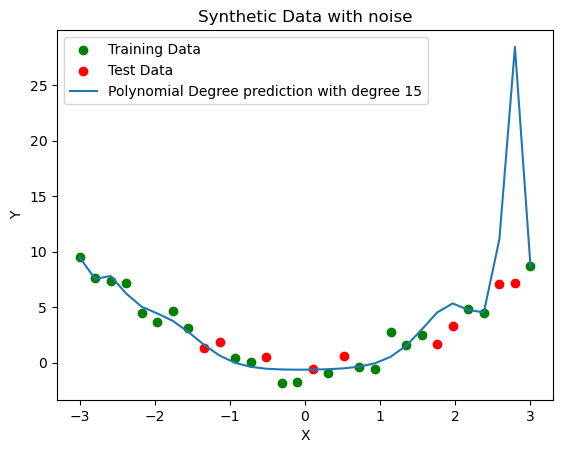

In [261]:
plt.scatter(X_train, Y_train, color = 'green', label = 'Training Data')
plt.scatter(X_test, Y_test, color = 'red', label = 'Test Data')
plt.plot(X_plot, Y_plot, label = 'Polynomial Degree prediction with degree 15')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Data with noise')
plt.legend()
plt.show()

In [263]:
degree = 15
poly_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha = 10.0))

In [265]:
poly_model.fit(X_train,Y_train )
y_train_pred = poly_model.predict(X_train)
y_test_pred = poly_model.predict(X_test)

In [267]:
mean_squared_error(Y_train, y_train_pred)
mean_squared_error(Y_test, y_test_pred)

53.82343530366073

In [269]:
print(" Model train MSE ", mean_squared_error(Y_train, y_train_pred))
print(" Model test MSE ", mean_squared_error(Y_test, y_test_pred))

 Model train MSE  0.5570069568157889
 Model test MSE  53.82343530366073


In [271]:
Y_plot_ridge = poly_model.predict(X_plot)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


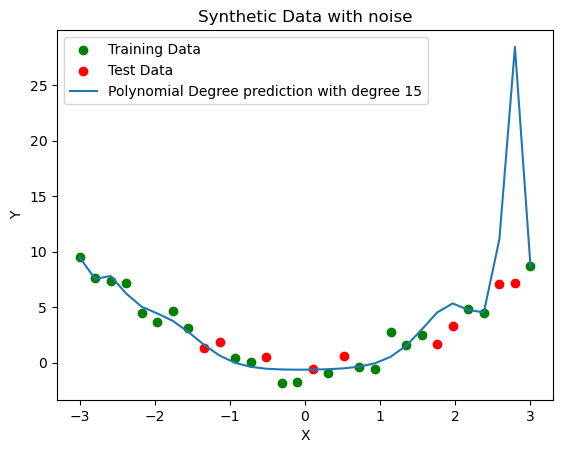

In [273]:
plt.scatter(X_train, Y_train, color = 'green', label = 'Training Data')
plt.scatter(X_test, Y_test, color = 'red', label = 'Test Data')
plt.plot(X_plot, Y_plot, label = 'Polynomial Degree prediction with degree 15')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Data with noise')
plt.legend()
plt.show()

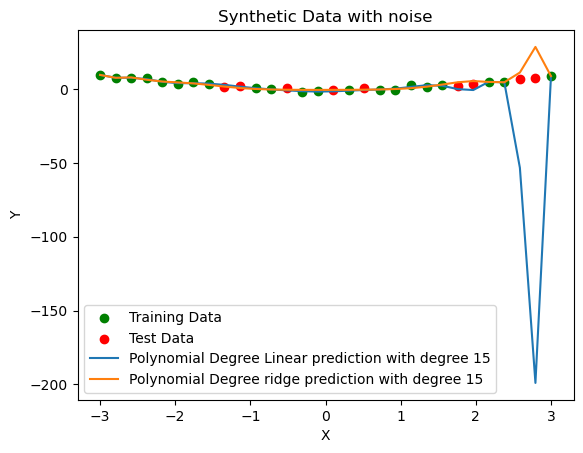

In [277]:
plt.scatter(X_train, Y_train, color = 'green', label = 'Training Data')
plt.scatter(X_test, Y_test, color = 'red', label = 'Test Data')
plt.plot(X_plot, Y_plot_lr, label = 'Polynomial Degree Linear prediction with degree 15')
plt.plot(X_plot, Y_plot_ridge, label = 'Polynomial Degree ridge prediction with degree 15')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Data with noise')
plt.legend()
plt.show()

In [ ]:
# Overfitted Model Train MSE :  0.24
# Overfitted Model Test MSE  :  5130

In [ ]:
# Reguralized Model Train MSE :  0.55
# Reguralized Model Test MSE  :  53.8